| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2_%20Redes_Neuronales.ipynb)| [⏩](./4_Arboles_de_Decision.ipynb)|

# **3. Una métrica esencial para clasificadores: Área Bajo la Curva ROC (Receiver Operating Characteristic)**

## **Introducción**

La métrica esencial conocida como el Área Bajo la Curva ROC (Receiver Operating Characteristic) es una medida que evalúa el rendimiento de un clasificador, especialmente en problemas de clasificación binaria. La curva ROC y su área correspondiente proporcionan información sobre la capacidad del clasificador para distinguir entre las clases positiva y negativa al variar el umbral de decisión. Aquí tienes una explicación detallada junto con un ejemplo y gráficas para comprender mejor esta métrica.

**Conceptos Básicos:**

1. **Curva ROC**: La Curva ROC es un gráfico que representa la tasa de verdaderos positivos (TPR, True Positive Rate) frente a la tasa de falsos positivos (FPR, False Positive Rate) a medida que se varía el umbral de decisión del clasificador.

2. **Área Bajo la Curva ROC (AUC)**: Es el área bajo la curva ROC y se utiliza como métrica para cuantificar el rendimiento del clasificador. Un valor más alto de AUC indica un mejor rendimiento en la capacidad de distinguir entre las clases.

**Ejemplo con Gráfica:**

Supongamos que tenemos un modelo de clasificación binaria y queremos evaluar su rendimiento utilizando la curva ROC y el AUC. Utilizaremos Scikit-learn para este ejemplo.

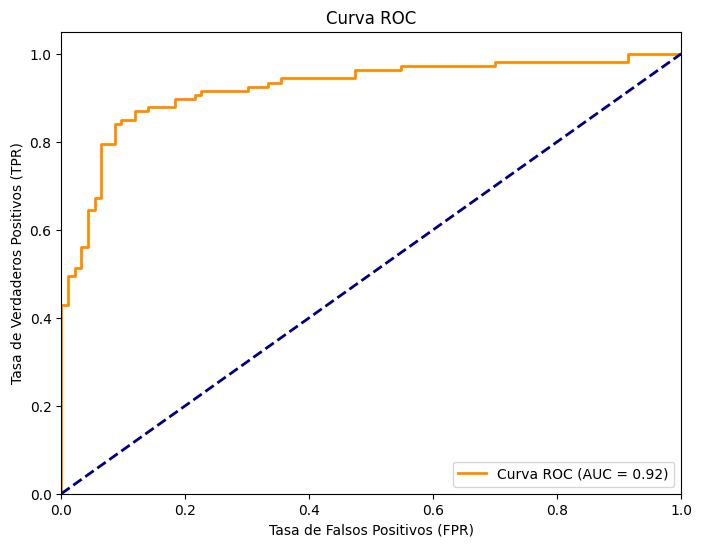

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generación de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo (en este caso, una regresión logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones de probabilidad en el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Cálculo de la Curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Gráfica de la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la Gráfica y AUC:**

En la gráfica resultante, la línea en azul punteado representa la línea base que corresponde a un clasificador aleatorio. La curva ROC (en naranja) está por encima de esta línea, lo que indica que el modelo tiene un rendimiento mejor que el azar. Cuanto más se acerque la curva a la esquina superior izquierda, mejor será el rendimiento del modelo. El AUC es el área bajo la curva ROC, que es una medida numérica que cuantifica la calidad general del clasificador. Un AUC cercano a 1 indica un excelente rendimiento, mientras que un valor cercano a 0.5 indica un rendimiento similar al azar.

En resumen, la curva ROC y el AUC son herramientas poderosas para evaluar y comparar la capacidad de discriminación de los modelos de clasificación binaria. Una curva ROC que se acerca a la esquina superior izquierda y un AUC alto sugieren un buen rendimiento del clasificador.

## **Verdaderos Positivos/Negativos y Falsos Positivos/Negativos**

Las métricas de Verdaderos Positivos (VP), Verdaderos Negativos (VN), Falsos Positivos (FP) y Falsos Negativos (FN) son conceptos clave en problemas de clasificación, especialmente en evaluación de modelos. Estas métricas permiten comprender cómo el modelo clasifica correctamente e incorrectamente las instancias de las clases positiva y negativa. Aquí tienes una explicación detallada junto con ejemplos y gráficas para ilustrar cada término.

**Conceptos Básicos:**

1. **Verdaderos Positivos (VP)**: Son las instancias que pertenecen a la clase positiva y fueron clasificadas correctamente como positivas por el modelo.

2. **Verdaderos Negativos (VN)**: Son las instancias que pertenecen a la clase negativa y fueron clasificadas correctamente como negativas por el modelo.

3. **Falsos Positivos (FP)**: Son las instancias que pertenecen a la clase negativa pero fueron clasificadas incorrectamente como positivas por el modelo.

4. **Falsos Negativos (FN)**: Son las instancias que pertenecen a la clase positiva pero fueron clasificadas incorrectamente como negativas por el modelo.

**Ejemplo con Gráfica:**

Supongamos que estamos evaluando un modelo de detección de enfermedades, donde la clase positiva representa la presencia de la enfermedad y la clase negativa representa la ausencia. Utilizaremos una matriz de confusión y una gráfica para ilustrar estos conceptos.

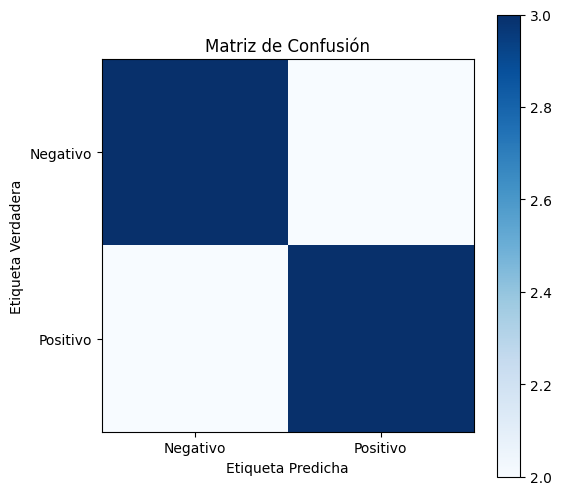

Verdaderos Positivos (VP): 3
Verdaderos Negativos (VN): 3
Falsos Positivos (FP): 2
Falsos Negativos (FN): 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Datos de ejemplo: Verdaderos Positivos (VP), Verdaderos Negativos (VN),
# Falsos Positivos (FP), Falsos Negativos (FN)
y_true = np.array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
y_pred = np.array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

# Cálculo de la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Extracción de valores
VP = conf_matrix[1, 1]
VN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Gráfica de la matriz de confusión
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negativo', 'Positivo'])
plt.yticks(tick_marks, ['Negativo', 'Positivo'])

plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Impresión de las métricas
print(f'Verdaderos Positivos (VP): {VP}')
print(f'Verdaderos Negativos (VN): {VN}')
print(f'Falsos Positivos (FP): {FP}')
print(f'Falsos Negativos (FN): {FN}')

**Interpretación de la Gráfica y Métricas:**

La matriz de confusión es una representación visual de cómo el modelo clasifica las instancias. La parte superior izquierda representa los Verdaderos Negativos (VN), la parte superior derecha los Falsos Positivos (FP), la parte inferior izquierda los Falsos Negativos (FN) y la parte inferior derecha los Verdaderos Positivos (VP).

En este ejemplo, puedes ver cómo calcular cada métrica a partir de la matriz de confusión. Las métricas nos proporcionan información detallada sobre el rendimiento del modelo en términos de aciertos y errores en las clasificaciones. Estas métricas son fundamentales para evaluar y mejorar modelos de clasificación, y también son la base de muchas otras métricas como la precisión, la sensibilidad (recall), la especificidad y la F1-score.

## **Umbral de clasificación**

El umbral de clasificación es un valor crítico utilizado en los modelos de clasificación para tomar decisiones sobre cómo asignar instancias a diferentes clases. En problemas de clasificación binaria, como predecir si un correo electrónico es spam o no spam, el umbral de clasificación es el valor que determina en qué punto se considera que una instancia pertenece a una clase específica. Aquí tienes una explicación detallada junto con ejemplos y gráficas para comprender mejor el concepto del umbral de clasificación.

**Concepto Básico:**

En un modelo de clasificación binaria, la salida puede ser una probabilidad o un valor numérico que representa la confianza del modelo en que una instancia pertenece a la clase positiva. El umbral de clasificación es un valor que separa estas probabilidades en dos clases distintas: positiva y negativa. Si la probabilidad calculada es mayor o igual al umbral, la instancia se clasifica como positiva; de lo contrario, se clasifica como negativa.

**Ejemplo con Gráfica:**

Supongamos que estamos trabajando con un modelo de clasificación binaria que predice si un estudiante aprobará un examen o no basándose en el tiempo de estudio. Vamos a utilizar un ejemplo ficticio para ilustrar cómo el umbral de clasificación afecta las decisiones del modelo.

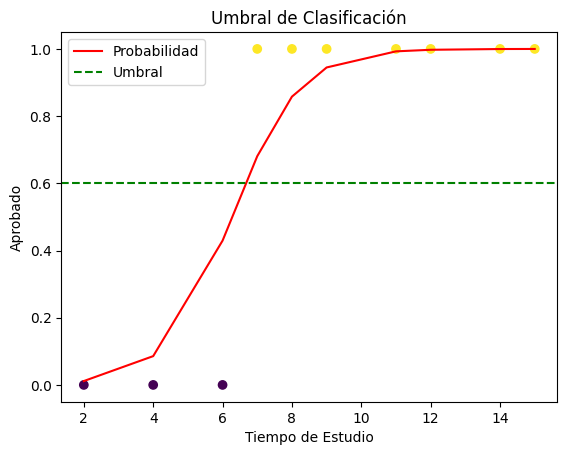

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo: tiempo de estudio (X) y aprobado (y)
X = np.array([2, 4, 6, 7, 8, 9, 11, 12, 14, 15]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

# Creación y entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Valores de probabilidad calculados por el modelo
probabilities = model.predict_proba(X)[:, 1]

# Umbral de clasificación
threshold = 0.6

# Clasificación basada en el umbral
predictions = (probabilities >= threshold).astype(int)

# Gráfica de los datos y la línea de umbral
plt.scatter(X, y, c=y)
plt.plot(X, probabilities, 'r', label='Probabilidad')
plt.axhline(y=threshold, color='g', linestyle='--', label='Umbral')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Aprobado')
plt.title('Umbral de Clasificación')
plt.legend()
plt.show()

**Interpretación de la Gráfica y Umbral:**

En la gráfica resultante, los puntos en azul representan a los estudiantes que no aprobaron (0) y los puntos en naranja representan a los estudiantes que aprobaron (1). La línea roja muestra cómo las probabilidades calculadas por el modelo (probabilidad de aprobar) varían según el tiempo de estudio.

El umbral de clasificación (línea verde punteada) se establece en 0.6 en este ejemplo. Esto significa que, si la probabilidad calculada es mayor o igual a 0.6, el modelo clasificará al estudiante como aprobado (1). De lo contrario, se clasificará como no aprobado (0). Ajustar el umbral de clasificación afectará el equilibrio entre los falsos positivos y los falsos negativos y puede ser útil según los objetivos del problema y el costo de los errores de clasificación.

El umbral de clasificación es una herramienta clave para personalizar el comportamiento del modelo de acuerdo con los requisitos del problema y la importancia relativa de las clases.

## **Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos**

Las tasas de Verdaderos Positivos (TPR) y Falsos Positivos (FPR) son métricas fundamentales en la evaluación de modelos de clasificación. Estas tasas están relacionadas con la capacidad del modelo para clasificar correctamente las instancias de la clase positiva y la tasa a la que clasifica incorrectamente las instancias de la clase negativa como positivas. A continuación, encontrarás una explicación detallada junto con ejemplos y gráficas para comprender mejor estos conceptos.

**Conceptos Básicos:**

1. **Tasa de Verdaderos Positivos (TPR o Sensibilidad)**: Es la proporción de instancias de la clase positiva que son clasificadas correctamente como positivas por el modelo. $TPR$ se calcula como  $\frac{VP}{VP + FN}$, donde $VP$ son los Verdaderos Positivos y $FN$ son los Falsos Negativos.

2. **Tasa de Falsos Positivos (FPR)**: Es la proporción de instancias de la clase negativa que son clasificadas incorrectamente como positivas por el modelo. $FPR$ se calcula como $\frac{FP}{FP + VN}$, donde $FP$ son los Falsos Positivos y $VN$ son los Verdaderos Negativos.

**Ejemplo con Gráfica:**

Supongamos que estamos trabajando con un modelo de detección de enfermedades que predice si una persona tiene una enfermedad o no. Utilizaremos un ejemplo ficticio para ilustrar cómo calcular las tasas de $TPR$ y $FPR$.

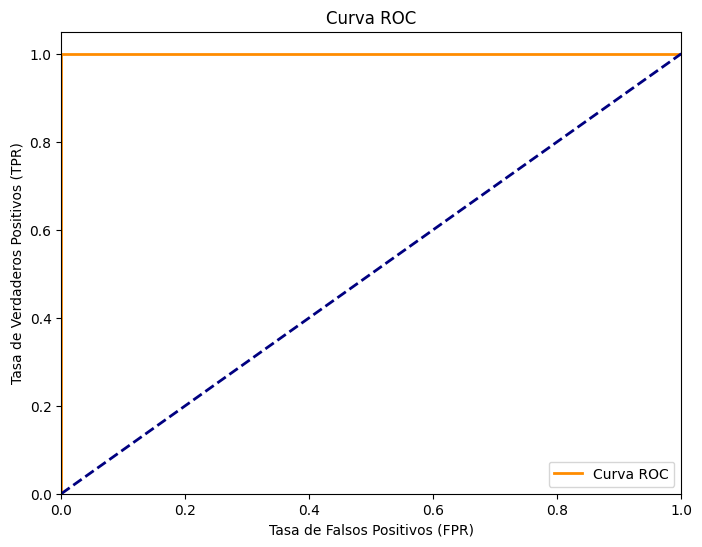

Tasa de Verdaderos Positivos (TPR): 1.00
Tasa de Falsos Positivos (FPR): 0.00


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Datos de ejemplo: probabilidad predicha y etiquetas reales
y_true = np.array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
y_pred_prob = np.array([0.8, 0.2, 0.6, 0.3, 0.7, 0.9, 0.4, 0.1, 0.2, 0.6])

# Cálculo de la Curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Gráfica de la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Cálculo de TPR y FPR para un umbral específico (ejemplo: umbral = 0.5)
umbral = 0.5
VP = sum((y_pred_prob >= umbral) & (y_true == 1))
FN = sum((y_pred_prob < umbral) & (y_true == 1))
FP = sum((y_pred_prob >= umbral) & (y_true == 0))
VN = sum((y_pred_prob < umbral) & (y_true == 0))

TPR = VP / (VP + FN)
FPR = FP / (FP + VN)

print(f'Tasa de Verdaderos Positivos (TPR): {TPR:.2f}')
print(f'Tasa de Falsos Positivos (FPR): {FPR:.2f}')

**Interpretación de la Gráfica y Tasas:**

En la gráfica de la Curva ROC, el eje X representa la Tasa de Falsos Positivos (FPR) y el eje Y representa la Tasa de Verdaderos Positivos (TPR). Cuanto más cerca esté la curva ROC de la esquina superior izquierda, mejor será el rendimiento del modelo en términos de balance entre TPR y FPR.

En el ejemplo, hemos calculado TPR y FPR para un umbral específico (0.5), utilizando las métricas Verdaderos Positivos (VP), Falsos Negativos (FN), Falsos Positivos (FP) y Verdaderos Negativos (VN). Tanto TPR como FPR son medidas clave para evaluar el rendimiento de un modelo de clasificación y son esenciales para tomar decisiones informadas sobre la capacidad del modelo para distinguir entre clases positivas y negativas.

## **Construcción de la Curva ROC**

La Curva ROC (Receiver Operating Characteristic) es una representación gráfica que muestra la relación entre la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) a medida que se varía el umbral de clasificación en un modelo de clasificación binaria. Esta curva es especialmente útil para evaluar el rendimiento de un modelo en problemas de clasificación en los que el equilibrio entre TPR y FPR es crucial. A continuación, te proporcionaré una explicación detallada junto con un ejemplo y una gráfica para comprender mejor la construcción de la Curva ROC.

**Conceptos Básicos:**

- **Tasa de Verdaderos Positivos (TPR)**: Proporción de instancias positivas correctamente clasificadas respecto al total de instancias positivas. Se calcula como $\frac{VP}{VP + FN}$.

- **Tasa de Falsos Positivos (FPR)**: Proporción de instancias negativas incorrectamente clasificadas como positivas respecto al total de instancias negativas. Se calcula como $\frac{FP}{FP + VN}$.

**Ejemplo con Gráfica:**

Supongamos que tenemos un modelo de clasificación binaria que predice si un correo electrónico es spam o no spam. Utilizaremos un ejemplo ficticio y Scikit-learn para construir y graficar la Curva ROC.

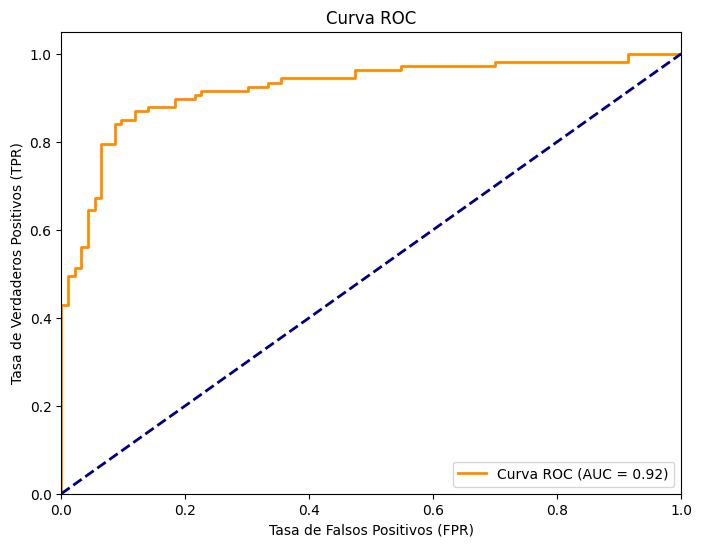

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generación de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo (en este caso, una regresión logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Probabilidades predichas en el conjunto de prueba
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Cálculo de la Curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Gráfica de la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la Gráfica y Curva ROC:**

La gráfica de la Curva ROC muestra la relación entre la TPR y la FPR a medida que el umbral de clasificación varía. La línea punteada en azul representa la línea base, que indica el rendimiento de un clasificador aleatorio.

En el ejemplo, la curva ROC en naranja está por encima de la línea base, lo que indica que el modelo tiene un rendimiento mejor que el azar. Cuanto más se acerque la curva ROC a la esquina superior izquierda, mejor será el rendimiento del modelo en términos de balance entre TPR y FPR.

El Área Bajo la Curva ROC (AUC) es un valor numérico que cuantifica el rendimiento global del modelo. Un AUC cercano a 1 indica un excelente rendimiento, mientras que un valor cercano a 0.5 indica un rendimiento similar al azar. La construcción y evaluación de la Curva ROC es una herramienta esencial para evaluar la capacidad de un modelo de clasificación para distinguir entre clases positivas y negativas.

## **Área bajo la curva ROC**

El Área Bajo la Curva ROC (AUC-ROC) es una métrica utilizada para evaluar el rendimiento de un modelo de clasificación en problemas binarios. La curva ROC (Receiver Operating Characteristic) es una representación gráfica de la relación entre la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) a diferentes umbrales de clasificación. El AUC-ROC mide el área bajo esta curva, proporcionando una medida numérica de la capacidad del modelo para distinguir entre las clases positiva y negativa. A continuación, te proporcionaré una explicación detallada junto con un ejemplo y una gráfica para comprender mejor el concepto del Área bajo la curva ROC.

**Conceptos Básicos:**

- **Curva ROC**: La Curva ROC es una representación gráfica que muestra cómo varía la TPR frente a la FPR a medida que se cambia el umbral de clasificación en un modelo de clasificación binaria.

- **Tasa de Verdaderos Positivos (TPR)**: Proporción de instancias positivas correctamente clasificadas respecto al total de instancias positivas.

- **Tasa de Falsos Positivos (FPR)**: Proporción de instancias negativas incorrectamente clasificadas como positivas respecto al total de instancias negativas.

**Ejemplo con Gráfica:**

Supongamos que tenemos un modelo de clasificación binaria que predice si un paciente tiene una enfermedad o no. Utilizaremos un ejemplo ficticio y Scikit-learn para calcular el AUC-ROC y graficar la Curva ROC.

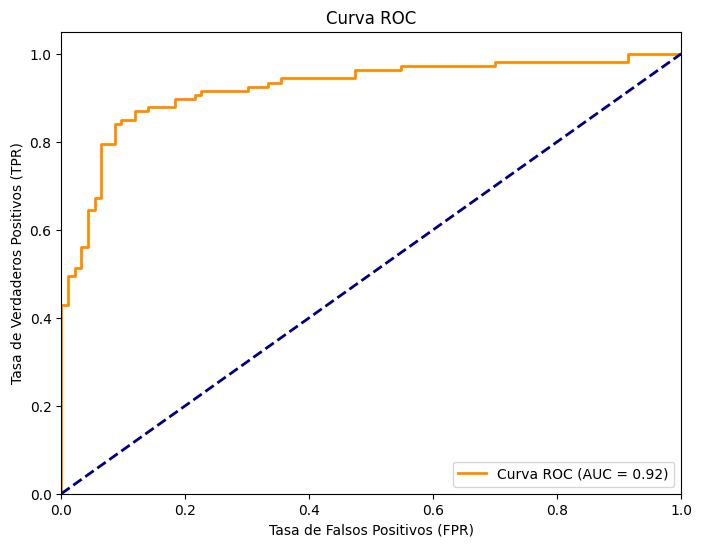

Área bajo la Curva ROC (AUC-ROC): 0.92


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generación de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo (en este caso, una regresión logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Probabilidades predichas en el conjunto de prueba
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Cálculo de la Curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Gráfica de la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f'Área bajo la Curva ROC (AUC-ROC): {roc_auc:.2f}')

**Interpretación del AUC-ROC:**

En la gráfica de la Curva ROC, el Área Bajo la Curva (AUC) mide el área entre la curva ROC y la línea base. Cuanto más cercano esté el AUC a 1, mejor será el rendimiento del modelo en términos de su capacidad para distinguir entre las clases. Un AUC-ROC de 0.5 indica un rendimiento similar al azar, mientras que un AUC-ROC cercano a 1 indica un rendimiento excepcional en la discriminación de clases.

El AUC-ROC es una métrica valiosa para comparar y evaluar modelos de clasificación, especialmente cuando el equilibrio entre las tasas de verdaderos positivos y falsos positivos es importante en el problema. Un mayor AUC-ROC sugiere que el modelo es capaz de clasificar correctamente un mayor porcentaje de instancias positivas y negativas en comparación con un modelo con un AUC-ROC más bajo.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2_%20Redes_Neuronales.ipynb)| [⏩](./4_Arboles_de_Decision.ipynb)|